<a href="https://colab.research.google.com/github/Jeymar06/ProyectoEstadisticaII/blob/main/ProyectoEstadisticaII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Proyecto Final – Estadística II  

**Estudiantes:**  
- **Greyler José Chacón Chaparro** — *Codigo: 2215636*  
- **Jeider Torres Martínez** — *Codigo: 2201431*  
- **Marcos Orjuela**

**Asignatura:** Estadística II  
**Docente:** *Elinana Bonalve*  
**Periodo:** *2025-1*  



## Análisis Estadístico del Rendimiento Estudiantil y sus Hábitos de Estudio

### 🎯 Introducción

En el presente proyecto se realiza un estudio estadístico aplicado al análisis del rendimiento académico y los hábitos de estudio de estudiantes, utilizando como base un conjunto de datos con variables relacionadas a características personales, sociales y académicas.

Este análisis forma parte del curso de **Estadística II**, y tiene como objetivo aplicar los conocimientos adquiridos sobre inferencia estadística, tales como:

- Pruebas de hipótesis para una y dos muestras
- Análisis de medias con varianzas conocidas o desconocidas
- Cálculo de errores tipo I y tipo II
- Interpretación de intervalos de confianza y potencia estadística

La pregunta central que orienta esta investigación es:  
**¿Existen diferencias significativas en los hábitos de estudio o el rendimiento académico en función del género u otras variables como el nivel educativo**

Además, se evalúa si los estudiantes cumplen con las recomendaciones mínimas de horas de estudio diarias sugeridas por organismos internacionales como la **National Education Association (NEA)**.

### 🧩 Dataset

El conjunto de datos utilizado proviene de una fuente disponible públicamente en Kaggle y contiene información como:

- Género del estudiante  
- Nivel educativo de los padres  
- Promedio académico  
- Horas de estudio por día  
- Nivel socioeconómico, entre otros

Este proyecto combina herramientas estadísticas con programación en Python para analizar la información, generar visualizaciones y extraer conclusiones que puedan ser útiles para el contexto educativo.

---

> El análisis aquí presentado permite no solo validar hipótesis estadísticas, sino también generar reflexiones en torno a cómo los factores sociales y personales pueden incidir en el desempeño académico de los estudiantes.


In [1]:
#@title **Librerias**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.stats import t, nct

In [ ]:
# #@title **Conectar con Drive Opcional**

# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/Estadistica/student_habits_performance.csv')

In [2]:
#@title **Conexion Principal**
github_dataset_url = 'https://raw.githubusercontent.com/Jeymar06/ProyectoEstadisticaII/refs/heads/main/student_habits_performance.csv'

df = pd.read_csv(github_dataset_url)

In [ ]:
#@title **Informacion Relevante**

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [ ]:
df_500 = df[:1000]

In [ ]:
df_hs = df[df['parental_education_level'] == 'Master']
df_hs

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,S1973,19,Male,4.4,4.3,3.2,No,76.0,5.4,Good,4,Master,Good,8,No,74.6
983,S1983,21,Male,3.9,1.8,2.1,No,74.0,6.5,Poor,2,Master,Average,2,No,64.4
985,S1985,18,Male,5.7,3.1,0.0,Yes,86.6,5.7,Fair,2,Master,Good,3,Yes,80.9
986,S1986,20,Male,1.1,1.7,2.2,No,91.4,7.0,Poor,5,Master,Poor,8,No,59.6


In [ ]:
df_hs = df[df['parental_education_level'] == 'Master']
df_hs

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,S1973,19,Male,4.4,4.3,3.2,No,76.0,5.4,Good,4,Master,Good,8,No,74.6
983,S1983,21,Male,3.9,1.8,2.1,No,74.0,6.5,Poor,2,Master,Average,2,No,64.4
985,S1985,18,Male,5.7,3.1,0.0,Yes,86.6,5.7,Fair,2,Master,Good,3,Yes,80.9
986,S1986,20,Male,1.1,1.7,2.2,No,91.4,7.0,Poor,5,Master,Poor,8,No,59.6


In [ ]:
df_g = df[df['gender'] == 'Male']
df_g

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
11,S1011,23,Male,3.9,2.4,2.5,No,71.7,7.9,Fair,2,Bachelor,Average,1,No,74.4
14,S1014,24,Male,2.4,1.5,0.7,No,87.4,6.7,Poor,6,Bachelor,Average,9,No,78.9
15,S1015,21,Male,3.1,5.0,1.0,No,97.5,6.5,Good,6,High School,Average,7,No,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,S1991,20,Male,6.0,2.1,3.0,No,86.7,5.1,Good,2,High School,Good,3,No,85.3
992,S1992,18,Male,3.5,0.0,1.9,No,96.8,6.4,Fair,3,Bachelor,Poor,3,No,71.8
993,S1993,20,Male,3.8,2.1,1.0,No,89.0,5.2,Good,1,High School,Good,7,No,70.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4


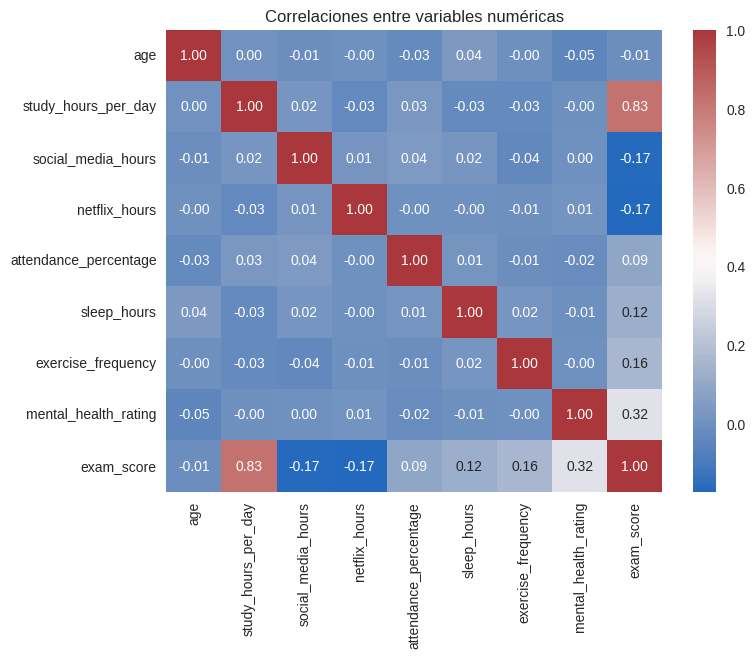

In [ ]:
#@title **Matriz De Correlacion**

# Matriz de correlación numérica
corr = df.select_dtypes(include=['int64','float64']).corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag")
plt.title("Correlaciones entre variables numéricas")
plt.show()

In [ ]:
#@title **Instanciar Variables**

x = df_g['study_hours_per_day'].to_numpy()
y = df_g['exam_score'].to_numpy()

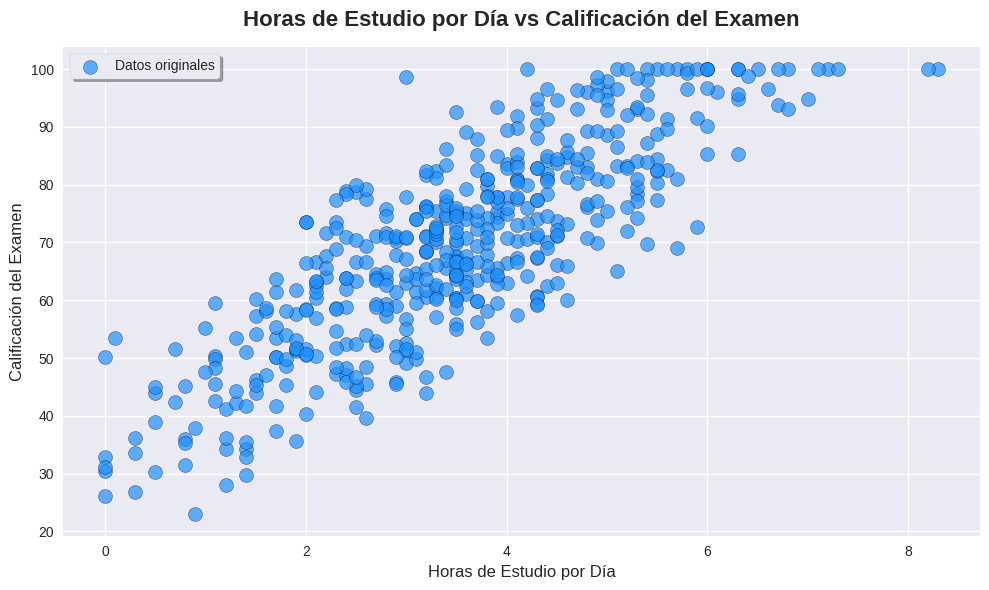

In [ ]:
#@title **Grafca De Dispersion**

sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='dodgerblue', s=100, edgecolor='black', alpha=0.7, label='Datos originales')
plt.title('Horas de Estudio por Día vs Calificación del Examen', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Horas de Estudio por Día', fontsize=12)
plt.ylabel('Calificación del Examen', fontsize=12)
plt.legend(fontsize=10, loc='best', frameon=True, shadow=True)
plt.tight_layout()
plt.show()

### **Análisis de la Gráfica de Dispersión: Horas de Estudio vs. Calificación del Examen**


####**Observaciones Clave:**

* **Correlación Positiva:** Se aprecia una clara relación positiva entre las horas de estudio diarias y la calificación del examen. A mayor dedicación al estudio mayor tiende a ser la puntuación obtenida.

* **Tendencia General:** La mayoría de los puntos siguen una trayectoria ascendente confirmando que las horas de estudio son un factor importante en el rendimiento académico.

* **Dispersión de Datos:** Aunque existe una tendencia los puntos no forman una línea perfecta lo que sugiere que otros factores (calidad del estudio, aptitud, etc.) también influyen en las calificaciones.

* **Puntajes Altos:** Para mayores horas de estudio se observa una concentración de puntos en las calificaciones más altas (cerca de 100) indicando que un estudio consistente puede llevar a un excelente rendimiento.

* **Posible Rendimiento Decreciente:** A partir de un cierto número de horas de estudio el incremento adicional en la calificación parece ser menos pronunciado lo que podría indicar un punto de saturación o rendimientos decrecientes.


In [ ]:
#@title **Prueba De Regresion Completa**

def regresion_completa(x, y, alpha=0.05, z=None, desv_abajo=1, desv_arriba=1,
                      limite_inf=None, limite_sup=None):

    # Validación básica
    n = len(x)
    if n != len(y):
        raise ValueError("x e y deben tener la misma longitud")
    if n <= 2:
        raise ValueError("Se necesitan al menos 3 puntos para regresión")

    # 1. Cálculos básicos
    x_barra = np.mean(x)
    y_barra = np.mean(y)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)
    sum_x2 = np.sum(x**2)
    sum_y2 = np.sum(y**2)

    SXX = sum_x2 - sum_x**2 / n
    SXY = sum_xy - sum_x * sum_y / n
    SYY = sum_y2 - sum_y**2 / n

    # 2. Coeficientes de regresión
    B1 = SXY / SXX
    B0 = y_barra - B1 * x_barra
    y_estimados = B0 + B1 * x

    # 3. Cálculo de SSE y varianza
    SSE = np.sum((y - y_estimados)**2)
    sigma2 = SSE / (n - 2)
    sigma = np.sqrt(sigma2)

    # 4. Varianzas y covarianzas de los coeficientes
    var_B1 = sigma2 / SXX
    std_B1 = np.sqrt(var_B1)

    var_B0 = sigma2 * (1/n + x_barra**2/SXX)
    std_B0 = np.sqrt(var_B0)
    cov_B0_B1 = -sigma2 * x_barra / SXX

    # 5. Intervalo de confianza para β₁
    # Acceder al t-distribution a través de stats
    t_critico = stats.t.ppf(1 - alpha/2, n-2)

    ic_B1_inf = B1 - t_critico * std_B1
    ic_B1_sup = B1 + t_critico * std_B1

    # 6. Cálculos para z si se proporciona
    resultados_z = {}
    if z is not None:
        y_estimado = B0 + B1 * z

        # Intervalo de probabilidad normal
        if limite_inf is not None or limite_sup is not None:
            lim_inf = limite_inf if limite_inf is not None else -np.inf
            lim_sup = limite_sup if limite_sup is not None else np.inf
            tipo = "absolutos"
        else:
            lim_inf = y_estimado - desv_abajo * sigma
            lim_sup = y_estimado + desv_arriba * sigma
            tipo = f"{desv_abajo}σ abajo y {desv_arriba}σ arriba"

        # Acceder al normal distribution a través de stats
        prob = stats.norm.cdf(lim_sup, loc=y_estimado, scale=sigma) - stats.norm.cdf(lim_inf, loc=y_estimado, scale=sigma)

        # Intervalo de predicción t-student
        error_pred = sigma * np.sqrt(1 + 1/n + (z - x_barra)**2/SXX)
        pred_inf = y_estimado - t_critico * error_pred
        pred_sup = y_estimado + t_critico * error_pred

        resultados_z = {
            'z': z,
            'y_estimado': y_estimado,
            'intervalo_probabilidad': (lim_inf, lim_sup),
            'tipo_intervalo_prob': tipo,
            'probabilidad': prob,
            'intervalo_prediccion': (pred_inf, pred_sup)
        }

    # 7. Resultados completos
    resultados = {
        'B0': B0, 'B1': B1,
        'sigma': sigma, 'sigma2': sigma2, 'SSE': SSE,
        'SXX': SXX, 'SXY': SXY, 'SYY': SYY,
        'r': SXY / np.sqrt(SXX * SYY),
        'x_barra': x_barra, 'y_barra': y_barra,
        'ic_B1': (ic_B1_inf, ic_B1_sup), 'std_B1': std_B1,
        'var_B0': var_B0, 'std_B0': std_B0, 'cov_B0_B1': cov_B0_B1,
        'y_estimados': y_estimados,
    }

    if resultados_z:
        resultados.update(resultados_z)

    # 8. Impresión de resultados
    print("\n----------- RESUMEN DE RESULTADOS -----------")
    print(f"Modelo de regresión: y = {B0:.4f} + {B1:.4f}x")
    print(f"\nSumas de cuadrados:")
    print(f"SXX (Suma de cuadrados de x): {SXX:.4f}")
    print(f"SXY (Suma de productos cruzados): {SXY:.4f}")
    print(f"SYY (Suma de cuadrados de y): {SYY:.4f}")
    print(f"\nEstimación de error:")
    print(f"Suma de cuadrados del error (SSE): {SSE:.4f}")
    print(f"Varianza del error (σ²): {sigma2:.4f}")
    print(f"Desviación estándar del error (σ): {sigma:.4f}")
    print(f"\nCoeficiente de correlación (r): {resultados['r']:.4f}")

    print(f"\nPropiedades de los coeficientes:")
    print(f"B0 (Intercepto):")
    print(f"  Varianza: {var_B0:.6f}")
    print(f"  Error estándar: {std_B0:.6f}")
    print(f"B1 (Pendiente):")
    print(f"  Varianza: {var_B1:.6f}")
    print(f"  Error estándar: {std_B1:.6f}")
    print(f"Covarianza(B0, B1): {cov_B0_B1:.6f}")

    print(f"\nIntervalo de confianza para β₁ ({(1-alpha)*100}%):")
    print(f"  Límite inferior: {ic_B1_inf:.6f}")
    print(f"  Límite superior: {ic_B1_sup:.6f}")
    print(f"  Error estándar de β₁: {std_B1:.6f}")

    if 'y_estimado' in resultados:
        print(f"\nPredicción para X = {z}:")
        print(f"  Y estimado: {y_estimado:.4f}")
        print(f"  Intervalo de probabilidad ({tipo}): ({lim_inf:.4f}, {lim_sup:.4f})")
        print(f"  Probabilidad: {prob*100:.2f}%")
        print(f"  Intervalo de predicción ({(1-alpha)*100}%): ({pred_inf:.4f}, {pred_sup:.4f})")

    return resultados

resultados = regresion_completa(x,y,alpha=0.05,z=45,desv_abajo=1,desv_arriba=1)


----------- RESUMEN DE RESULTADOS -----------
Modelo de regresión: y = 35.7555 + 9.5744x

Sumas de cuadrados:
SXX (Suma de cuadrados de x): 1045.8355
SXY (Suma de productos cruzados): 10013.2614
SYY (Suma de cuadrados de y): 140016.5920

Estimación de error:
Suma de cuadrados del error (SSE): 44145.4846
Varianza del error (σ²): 92.9379
Desviación estándar del error (σ): 9.6404

Coeficiente de correlación (r): 0.8275

Propiedades de los coeficientes:
B0 (Intercepto):
  Varianza: 1.290092
  Error estándar: 1.135822
B1 (Pendiente):
  Varianza: 0.088865
  Error estándar: 0.298102
Covarianza(B0, B1): -0.311977

Intervalo de confianza para β₁ (95.0%):
  Límite inferior: 8.988652
  Límite superior: 10.160175
  Error estándar de β₁: 0.298102

Predicción para X = 45:
  Y estimado: 466.6041
  Intervalo de probabilidad (1σ abajo y 1σ arriba): (456.9637, 476.2446)
  Probabilidad: 68.27%
  Intervalo de predicción (95.0%): (435.7784, 497.4298)


# Ley de los grandes Numeros


In [ ]:
#@title **Ley De Los Grandes Numeros**

def law_of_large_numbers(data, num_trials):

 population_mean = np.mean(data)
 cumulative_averages = []

 for i in range(1, num_trials + 1):
    sample = np.random.choice(data, size=i, replace=True)
    cumulative_averages.append(np.mean(sample))

 return np.array(cumulative_averages), population_mean


num_trials = 1000
cumulative_averages, population_mean = law_of_large_numbers(df['study_hours_per_day'].to_numpy(), num_trials)

print(f"Media de la Población (Horas de Estudio por Día): {population_mean}")

Media de la Población (Horas de Estudio por Día): 3.5501000000000005


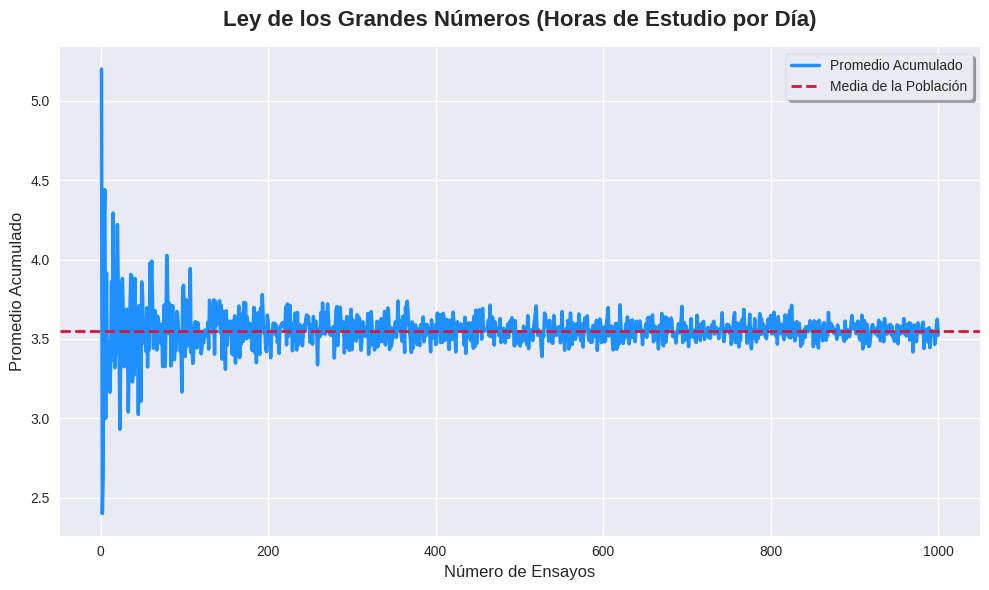

In [ ]:
#@title **Ley De Los Grandes Numeros (Horas de Estudio por Día)**

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_trials + 1), cumulative_averages, color='dodgerblue', linewidth=2.5, label='Promedio Acumulado')
plt.axhline(y=population_mean, color='crimson', linestyle='--', linewidth=2, label='Media de la Población')
plt.title('Ley de los Grandes Números (Horas de Estudio por Día)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Número de Ensayos', fontsize=12)
plt.ylabel('Promedio Acumulado', fontsize=12)
plt.legend(fontsize=10, loc='best', frameon=True, shadow=True)
plt.tight_layout()
plt.show()

### **Análisis de la Ley de los Grandes Números (Horas de Estudio por Día)**


####**Observaciones Clave:**

* **Convergencia Hacia la Media Poblacional:** La gráfica ilustra claramente la Ley de los Grandes Números. Se observa cómo el "Promedio Acumulado" (línea azul) fluctúa considerablemente al inicio con un número bajo de ensayos. Sin embargo, a medida que el "Número de Ensayos" (muestras) aumenta, el promedio acumulado se acerca y se estabiliza progresivamente alrededor de la "Media Poblacional" (línea discontinua roja) que en este caso es de aproximadamente 3.55 horas.

* **Estabilidad con Más Datos:** La volatilidad de la media muestral es alta cuando se toman pocas muestras pero disminuye drásticamente a medida que el tamaño de la muestra acumulada crece. Esto demuestra que un mayor número de observaciones permite obtener una estimación más precisa y estable del verdadero promedio de la población.

* **Principio Fundamental de la Estadística:** Esta visualización reafirma el principio fundamental de que para obtener estimaciones confiables de las características de una población (como su media) es crucial trabajar con un tamaño de muestra suficientemente grande.


In [ ]:
#@title **Ley De Los Grandes Numeros (Calificación del Examen)**

cumulative_averages_exam, population_mean_exam = law_of_large_numbers(df['exam_score'].to_numpy(), num_trials)

print(f"Media de la Población (Calificación del Examen): {population_mean_exam}")

Media de la Población (Calificación del Examen): 69.6015


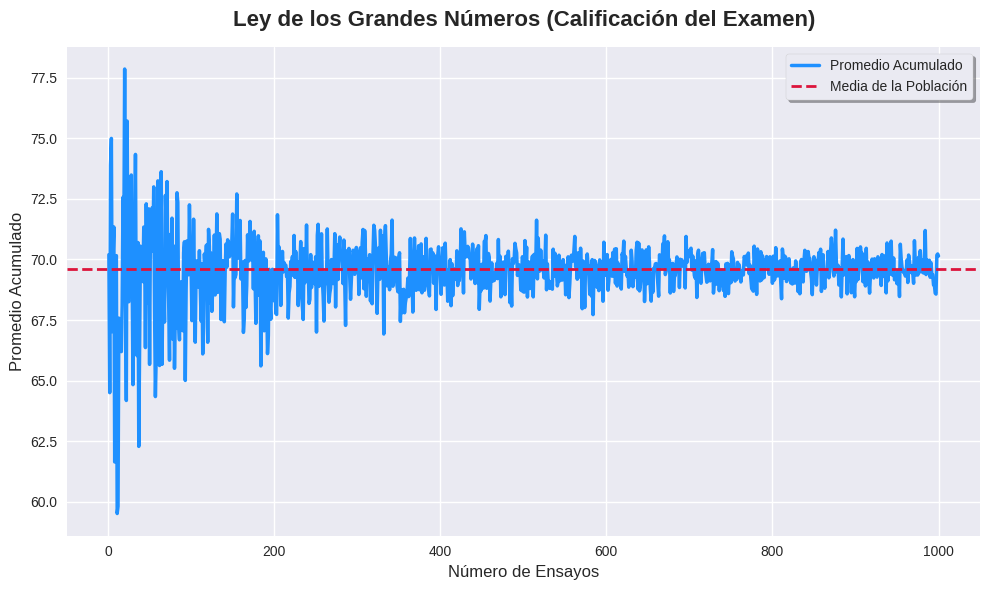

In [ ]:
#@title **Ley De Los Grandes Numeros (Calificación del Examen)**

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_trials + 1), cumulative_averages_exam, color='dodgerblue', linewidth=2.5, label='Promedio Acumulado')
plt.axhline(y=population_mean_exam, color='crimson', linestyle='--', linewidth=2, label='Media de la Población')
plt.title('Ley de los Grandes Números (Calificación del Examen)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Número de Ensayos', fontsize=12)
plt.ylabel('Promedio Acumulado', fontsize=12)
plt.legend(fontsize=10, loc='best', frameon=True, shadow=True)
plt.tight_layout()
plt.show()

###**Análisis de la Ley de los Grandes Números (Calificación del Examen)**

####**Observaciones Clave:**

* **Convergencia Hacia la Media de la Población:** Esta gráfica al igual que la anterior ejemplifica la Ley de los Grandes Números. Se puede observar cómo el "Promedio Acumulado" (línea azul) que representa la media de las calificaciones de examen de las muestras tomadas inicialmente exhibe una gran variabilidad.

* **Estabilización con Más Ensayos:** A medida que el "Número de Ensayos" (es decir, el tamaño acumulado de la muestra) aumenta progresivamente el promedio acumulado se estabiliza y converge de manera notoria hacia la "Media de la Población" (línea discontinua roja) que en este caso es aproximadamente 69.60.

* **Precisión de la Estimación:** La gráfica demuestra que para obtener una estimación cada vez más precisa y confiable de la media verdadera de las calificaciones de examen de la población es esencial aumentar el número de observaciones o muestras. La fluctuación inicial se reduce drásticamente a medida que se incorporan más datos.


# Teorema Del Limite Central


In [ ]:
#@title **Teorema Del Limite Central**

def central_limit_theorem(data, sample_size, num_samples):

  population_mean = np.mean(data)
  population_std = np.std(data)
  sample_means = []

  for _ in range(num_samples):
    sample = np.random.choice(data, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

  sample_means = np.array(sample_means)
  sample_std = np.std(sample_means)

  return sample_means, population_mean, population_std, sample_std


sample_means, population_mean, population_std, sample_std = central_limit_theorem(df['study_hours_per_day'].to_numpy(), 30, 1000)

sample_means_exam, population_mean_exam, population_std_exam, sample_std_exam = central_limit_theorem(df['exam_score'].to_numpy(), 30, 1000)

Media de la Población (horas estudio por dia): 3.5501000000000005
Desviación Estándar de la Población (horas estudio por dia): 1.4681553017307127
Media de las Medias Muestrales (horas estudio por dia): 3.534143333333333
Desviación Estándar de las Medias Muestrales (horas estudio por dia): 0.2717370859857005


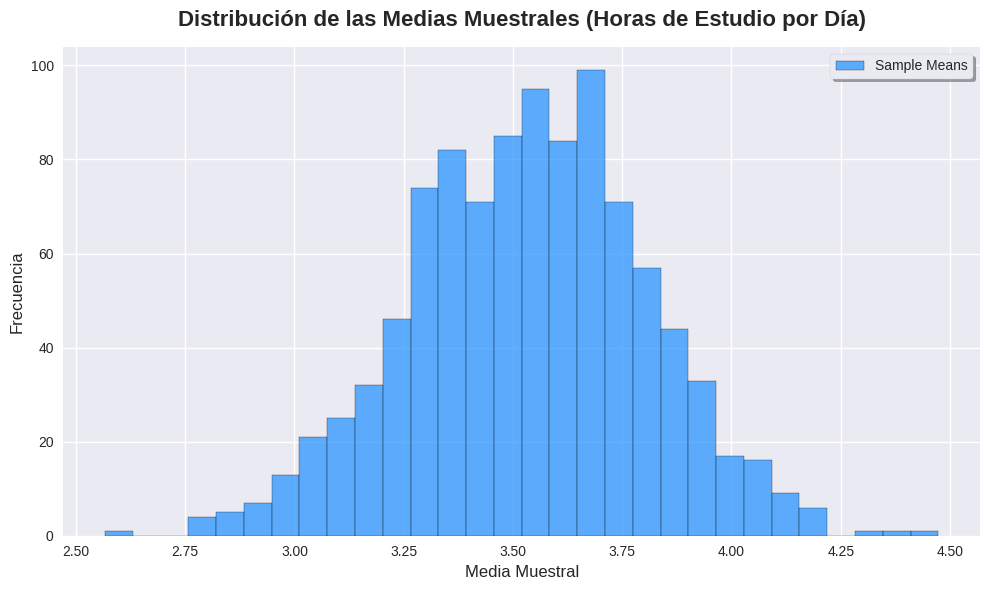

In [ ]:
#@title **Histograma Horas de Estudio por Día**

# --- Imprimir estadísticas para study_hours_per_day (en español) ---
print(f"Media de la Población (horas estudio por dia): {population_mean}")
print(f"Desviación Estándar de la Población (horas estudio por dia): {population_std}")
print(f"Media de las Medias Muestrales (horas estudio por dia): {np.mean(sample_means)}")
print(f"Desviación Estándar de las Medias Muestrales (horas estudio por dia): {sample_std}")

# --- Primera gráfica: Histograma de study_hours_per_day ---
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, color='dodgerblue', edgecolor='black', alpha=0.7, label='Sample Means')
plt.title('Distribución de las Medias Muestrales (Horas de Estudio por Día)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Media Muestral', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=10, loc='best', frameon=True, shadow=True)
plt.tight_layout()
plt.show()

### **Análisis de la Distribución de las Medias Muestrales (Horas de Estudio por Día)**


####**Observaciones Clave:**

* **Forma Normal:** La gráfica muestra la distribución de las medias de múltiples muestras tomadas de los datos de "horas de estudio por día". Se observa que la distribución de estas medias muestrales tiene una forma que se aproxima a una curva de campana (distribución normal) lo cual es consistente con el **Teorema del Límite Central (TLC)**.

* **Centrada Alrededor de la Media Poblacional:** El pico de la distribución se encuentra cerca del valor de la Media Poblacional de las horas de estudio (aproximadamente 3.55) y también muy cerca de la Media de las Medias Muestrales (aproximadamente 3.57). Esto demuestra que las medias muestrales tienden a agruparse alrededor del verdadero valor de la media de la población.

* **Menor Variabilidad que la Población Original:** La dispersión (desviación estándar) de esta distribución de medias muestrales (aproximadamente 0.27) es notablemente menor que la desviación estándar de la población original de horas de estudio (aproximadamente 1.47). Esto es una característica clave del TLC: las medias de las muestras son menos variables que los datos individuales de la población.

* **Implicación del Teorema del Límite Central:** La forma y el centrado de esta distribución confirman el poder del Teorema del Límite Central el cual establece que, independientemente de la forma de la distribución de la población original la distribución de las medias muestrales (para muestras lo suficientemente grandes) tenderá a ser normal. Esto es fundamental para la inferencia estadística, ya que permite hacer afirmaciones sobre los parámetros poblacionales basándose en las estadísticas de las muestras.



Media de la Población (calificación examen): 69.6015
Desviación Estándar de la Población (calificación examen): 16.880117527730665
Media de las Medias Muestrales (calificación examen): 69.68535
Desviación Estándar de las Medias Muestrales (calificación examen): 3.256907075696546


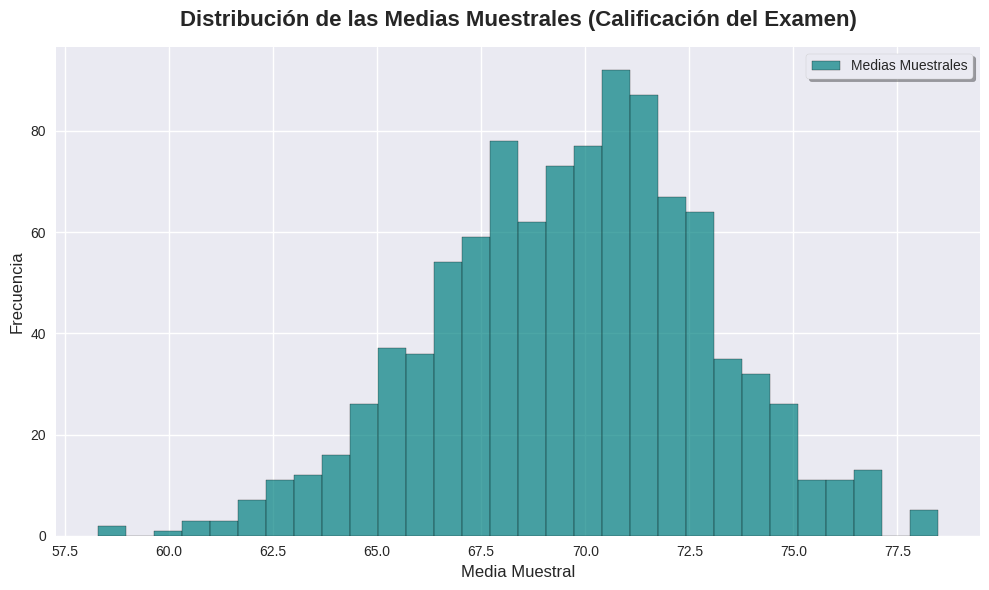

In [ ]:
#@title **Histograma Exam Score**

# --- Imprimir estadísticas para exam_score (en español) ---
print(f"\nMedia de la Población (calificación examen): {population_mean_exam}")
print(f"Desviación Estándar de la Población (calificación examen): {population_std_exam}")
print(f"Media de las Medias Muestrales (calificación examen): {np.mean(sample_means_exam)}")
print(f"Desviación Estándar de las Medias Muestrales (calificación examen): {sample_std_exam}")

# --- Segunda gráfica: Histograma de exam_score (en español) ---
plt.figure(figsize=(10, 6))
plt.hist(sample_means_exam, bins=30, color='teal', edgecolor='black', alpha=0.7, label='Medias Muestrales')
plt.title('Distribución de las Medias Muestrales (Calificación del Examen)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Media Muestral', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=10, loc='best', frameon=True, shadow=True)
plt.tight_layout()
plt.show()


### **Análisis de la Distribución de las Medias Muestrales (Calificación del Examen)**


####**Observaciones Clave:**

* **Confirmación del Teorema del Límite Central (TLC):** La gráfica presenta la distribución de las medias de múltiples muestras de las calificaciones del examen. Se observa que esta distribución a pesar de la posible forma de la población original de calificaciones exhibe una forma que se aproxima considerablemente a una distribución normal (en forma de campana) lo cual es una clara demostración del Teorema del Límite Central.

* **Centrado en la Media Poblacional:** El punto central de la distribución de las medias muestrales se encuentra muy cerca de la Media de la Población de las calificaciones (aproximadamente 69.60) y de la Media de las Medias Muestrales (aproximadamente 69.46). Esto indica que las medias de las muestras son estimadores insesgados del parámetro poblacional.

* **Menor Variabilidad Muestral:** La dispersión de esta distribución de medias muestrales (con una desviación estándar de aproximadamente 3.03) es significativamente menor que la desviación estándar de la población original de calificaciones de examen (aproximadamente 16.88). Esto es una propiedad clave del TLC: la variabilidad de las medias muestrales es menor que la variabilidad de los datos individuales de la población.

* **Relevancia para la Inferencia Estadística:** La forma aproximadamente normal y la menor variabilidad de esta distribución de medias muestrales son fundamentales en estadística inferencial. Permiten a los investigadores realizar inferencias y pruebas de hipótesis sobre la media de la población incluso si no se conoce la distribución exacta de la población basándose únicamente en las propiedades de las medias de las muestras.


# Graficas

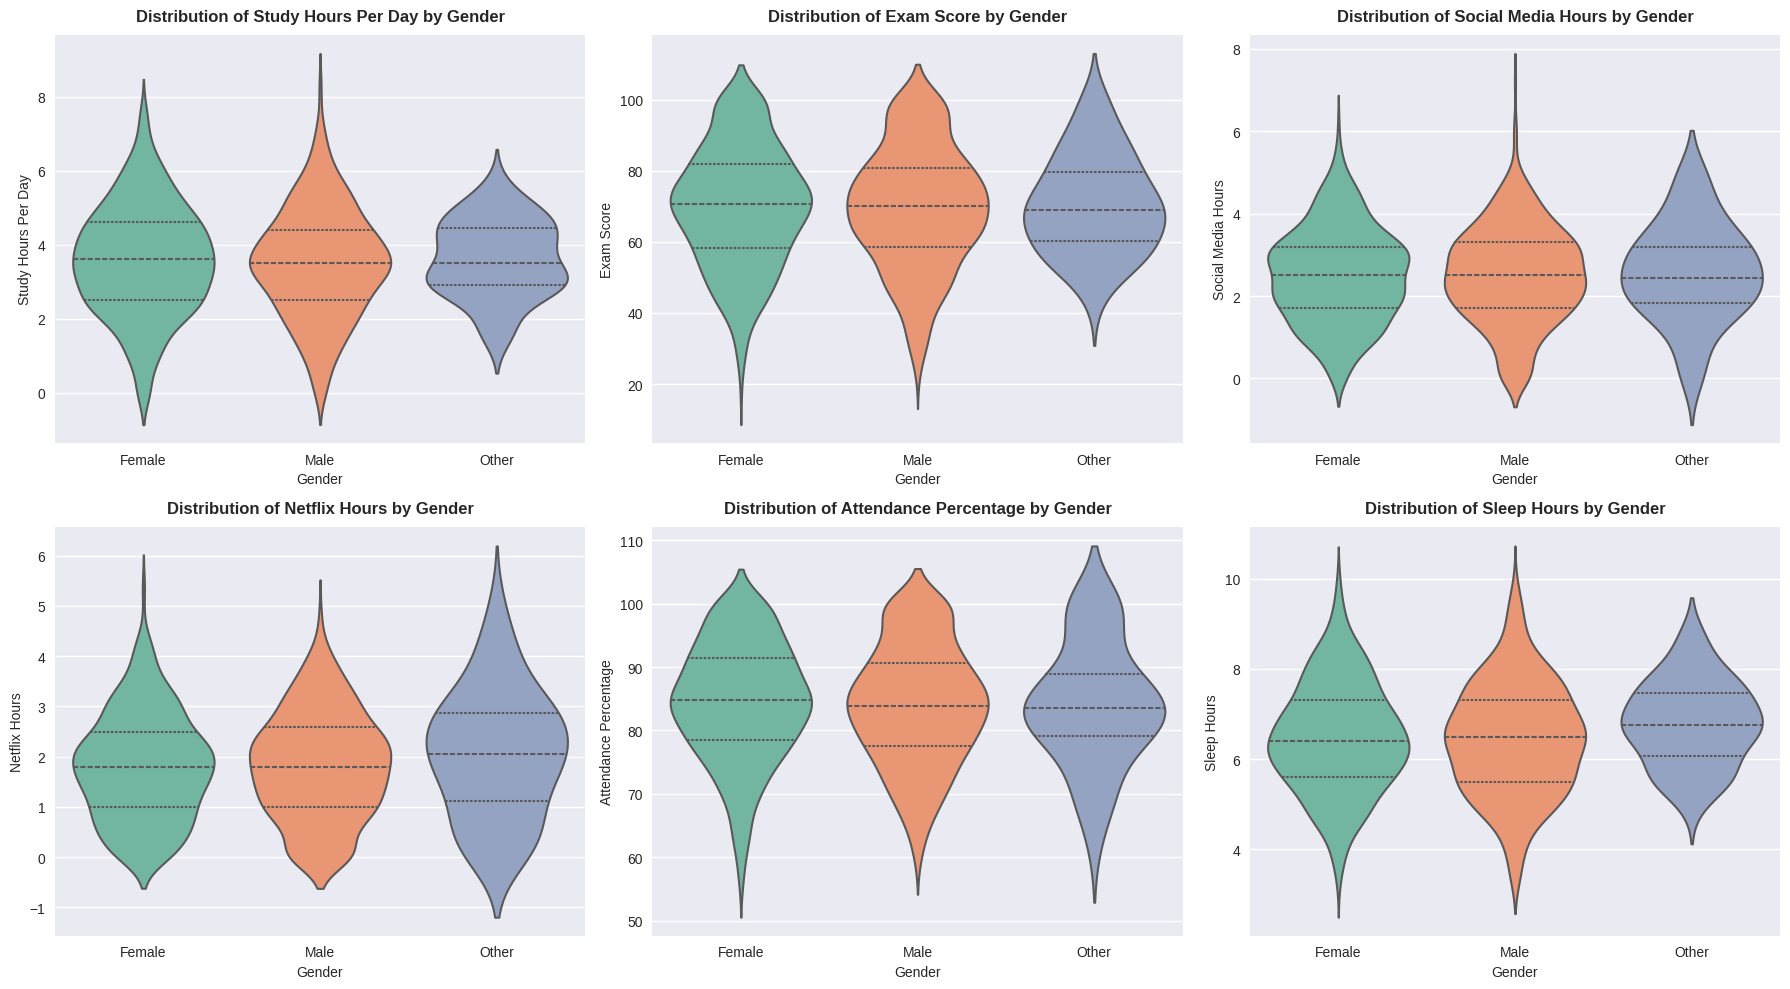

In [ ]:
#@title **Graficas de Violin**

sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

numeric_columns = ['study_hours_per_day', 'exam_score', 'social_media_hours',
                   'netflix_hours', 'attendance_percentage', 'sleep_hours']

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=False)
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.violinplot(x='gender', y=col, hue='gender', data=df, ax=axes[i],
                   palette='Set2', inner='quartile', linewidth=1.5, legend=False)
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()} by Gender',
                      fontsize=12, fontweight='bold', pad=10)
    axes[i].set_xlabel('Gender', fontsize=10)
    axes[i].set_ylabel(col.replace("_", " ").title(), fontsize=10)

plt.tight_layout()
plt.show()

### **Análisis de la Distribución de Variables por Género (Gráficos de Violín)**


Estos gráficos de violín muestran la distribución de varias variables (horas de estudio, calificación del examen, horas de redes sociales, horas de Netflix, porcentaje de asistencia y horas de sueño) desglosadas por género (Femenino, Masculino, Otro). Los gráficos de violín son útiles para visualizar la densidad de probabilidad de los datos mostrando la mediana (línea central discontinua), los cuartiles (líneas interiores discontinuas) y la forma general de la distribución.

####**Observaciones Clave:**

* **Horas de Estudio por Día:** Se observa una concentración ligeramente mayor en las horas de estudio para el género femenino en comparación con el masculino y 'Otro' aunque las distribuciones generales son similares.

* **Calificación del Examen:** Las mujeres muestran una distribución de calificaciones de examen con una densidad más alta en los rangos superiores sugiriendo un rendimiento ligeramente superior o más consistente en comparación con los hombres y 'Otro' cuyas distribuciones son un poco más dispersas hacia calificaciones más bajas.

* **Horas de Redes Sociales:** Las distribuciones de horas en redes sociales son bastante similares entre los tres géneros con medianas y formas de densidad que no revelan diferencias significativas.

* **Horas de Netflix:** Los géneros Masculino y 'Otro' parecen tener distribuciones con una mediana ligeramente más alta y una mayor dispersión en las horas de Netflix en comparación con el género femenino que tiende a concentrarse en menos horas.

* **Porcentaje de Asistencia:** El género femenino exhibe una concentración más fuerte y una mediana más alta en el porcentaje de asistencia indicando una asistencia más consistente y generalmente superior en comparación con el género masculino y 'Otro' que muestran una dispersión ligeramente mayor hacia porcentajes más bajos.

* **Horas de Sueño:** Las distribuciones de las horas de sueño son muy similares entre los tres géneros con medianas y rangos de datos superpuestos lo que sugiere que no hay diferencias sustanciales en el patrón de sueño entre estas categorías.

Los gráficos sugieren algunas diferencias sutiles en los hábitos de estudio, rendimiento académico y asistencia donde el género femenino tiende a mostrar patrones de mayor dedicación y resultados. En contraste, las actividades de ocio digital (redes sociales y Netflix) y las horas de sueño muestran distribuciones más equitativas o con ligeras variaciones entre los géneros.


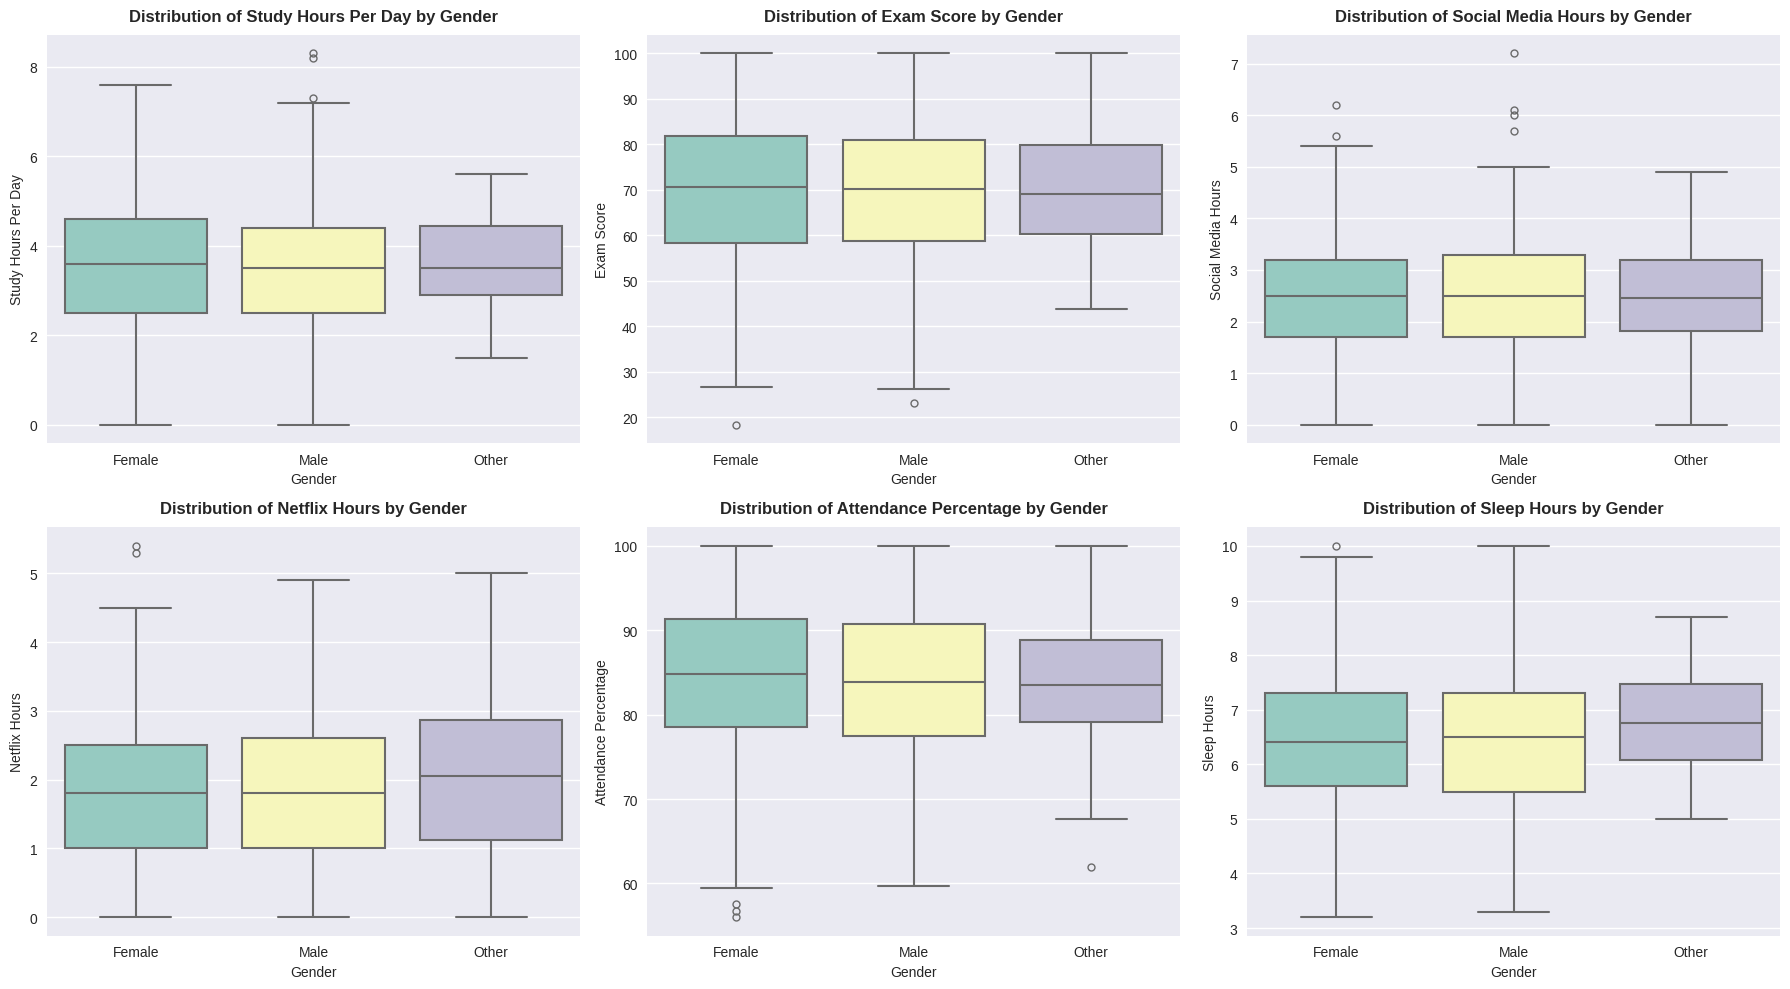

In [ ]:
#@title **Graficas de cajas**
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

numeric_columns = ['study_hours_per_day', 'exam_score', 'social_media_hours',
                   'netflix_hours', 'attendance_percentage', 'sleep_hours']

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=False)
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x='gender', y=col, hue='gender', data=df, ax=axes[i],
                palette='Set3', linewidth=1.5, fliersize=5, legend=False)
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()} by Gender',
                      fontsize=12, fontweight='bold', pad=10)
    axes[i].set_xlabel('Gender', fontsize=10)
    axes[i].set_ylabel(col.replace("_", " ").title(), fontsize=10)

plt.tight_layout()
plt.show()

###**Análisis de la Distribución de Variables por Género (Gráficos de Caja)**


Estos gráficos de caja (box plots) muestran la distribución de varias variables clave (horas de estudio, calificación del examen, horas de redes sociales, horas de Netflix, porcentaje de asistencia y horas de sueño) segmentadas por género (Femenino, Masculino, Otro). Cada caja representa el rango intercuartil (IQR, el 50% central de los datos), la línea central es la mediana, y los "bigotes" (whiskers) extienden hasta 1.5 veces el IQR. Los puntos individuales fuera de los bigotes son considerados valores atípicos (outliers).

####**Observaciones Clave:**

* **Horas de Estudio por Día:** Se observa que el género femenino presenta una mediana ligeramente más alta en las horas de estudio con una distribución central que tiende a concentrarse en más horas comparado con el masculino y 'Otro' cuyas medianas son un poco menores.

* **Calificación del Examen:** Las mujeres muestran una mediana de calificación de examen notablemente más alta y una distribución más compacta en los rangos superiores. Los géneros masculino y 'Otro' presentan medianas ligeramente más bajas y una mayor dispersión en sus calificaciones incluyendo más valores atípicos en el extremo inferior.

* **Horas de Redes Sociales:** Las distribuciones de horas dedicadas a redes sociales son muy similares entre los tres géneros. Las medianas y los rangos intercuartiles se superponen considerablemente lo que sugiere una falta de diferencias significativas en este hábito.

* **Horas de Netflix:** Los géneros masculino y 'Otro' muestran medianas ligeramente superiores en el consumo de Netflix y sus cajas indican un rango intercuartil que se extiende a más horas en comparación con el género femenino.

* **Porcentaje de Asistencia:** El género femenino exhibe una mediana más alta y un rango intercuartil más concentrado en los porcentajes de asistencia más elevados lo que indica una mayor y más consistente asistencia. Los otros géneros tienen medianas un poco más bajas y una mayor variabilidad.

* **Horas de Sueño:** No se aprecian diferencias significativas en las horas de sueño entre los géneros. Las medianas y las cajas son muy similares lo que sugiere patrones de sueño comparables en los tres grupos.

En si los gráficos de caja refuerzan las tendencias observadas en los gráficos de violín destacando que el género femenino tiende a exhibir mayores horas de estudio, mejores calificaciones y mayor asistencia, mientras que en horas de redes sociales y sueño, las diferencias son mínimas. En el consumo de Netflix los hombres y el grupo 'Otro' muestran un consumo ligeramente superior.


# Tres Análisis De Regresión

In [ ]:
#@title **Preparacion De Variables**


# Variables para el análisis
dependent_var = 'exam_score'  # Variable dependiente
independent_var = 'study_hours_per_day'  # Variable independiente

# Extraer datos y eliminar nulos (si los hay)
data = df[[independent_var, dependent_var]].dropna()

# Preparar variables
X = data[independent_var].values.reshape(-1, 1)  # Variable independiente
y = data[dependent_var].values  # Variable dependiente

--- Regresión Lineal Simple ---
Variable independiente: study_hours_per_day
Intercepto: 35.9102
Coeficiente: 9.4903
R²: 0.6813
Shapiro-Wilk (residuos): Estadístico=0.9979, p-valor=0.2318
Normalidad de residuos: Normal (p < 0.05)




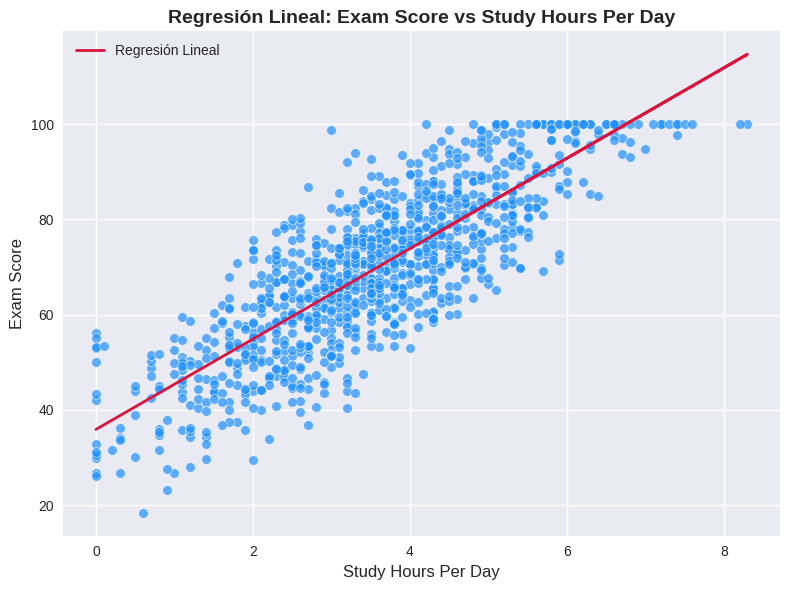

In [ ]:
#@title **1. Regresión Lineal Simple**

# Modelo
model_linear = LinearRegression()
model_linear.fit(X, y)
y_pred_linear = model_linear.predict(X)

# Residuos
residuals_linear = y - y_pred_linear
shapiro_stat_linear, shapiro_p_linear = stats.shapiro(residuals_linear)

# Resultados
r2_linear = model_linear.score(X, y)
print("--- Regresión Lineal Simple ---")
print(f"Variable independiente: {independent_var}")
print(f"Intercepto: {model_linear.intercept_:.4f}")
print(f"Coeficiente: {model_linear.coef_[0]:.4f}")
print(f"R²: {r2_linear:.4f}")
print(f"Shapiro-Wilk (residuos): Estadístico={shapiro_stat_linear:.4f}, p-valor={shapiro_p_linear:.4f}")
print(f"Normalidad de residuos: {'No normal' if shapiro_p_linear < 0.05 else 'Normal'} (p < 0.05)")
print("\n")

# Gráfica
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data[independent_var], y=data[dependent_var], color='dodgerblue', alpha=0.7)
plt.plot(data[independent_var], y_pred_linear, color='crimson', linewidth=2, label='Regresión Lineal')
plt.title(f'Regresión Lineal: {dependent_var.replace("_", " ").title()} vs {independent_var.replace("_", " ").title()}',
          fontsize=14, fontweight='bold')
plt.xlabel(independent_var.replace("_", " ").title(), fontsize=12)
plt.ylabel(dependent_var.replace("_", " ").title(), fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### **Análisis de la Regresión Lineal: Calificación del Examen vs. Horas de Estudio por Día**


Este gráfico de dispersión con una línea de regresión lineal superpuesta visualiza la relación entre las horas de estudio diarias (variable independiente en el eje X) y la calificación obtenida en el examen (variable dependiente en el eje Y).

####**Observaciones Clave de la Gráfica y los Estadísticos:**

* **Relación Positiva Fuerte:** La gráfica muestra una clara **relación lineal positiva** entre las horas de estudio y la calificación del examen. A medida que aumentan las horas dedicadas al estudio las calificaciones del examen tienden a ser más altas. La línea de regresión que representa esta tendencia asciende consistentemente.

* **Coeficiente de Regresión (9.4903):** El coeficiente de la variable 'study_hours_per_day' indica que, por cada hora adicional de estudio por día se predice un aumento promedio de aproximadamente **9.49 puntos** en la calificación del examen.

* **Intercepto (35.9102):** El intercepto sugiere que un estudiante que no dedica horas al estudio (0 horas) tendría una calificación predicha de aproximadamente **35.91 puntos**.

* **Coeficiente de Determinación (R² = 0.6813):** Este valor indica que aproximadamente el **68.13% de la variabilidad** en las calificaciones del examen puede ser explicada por las horas de estudio diarias. Esto sugiere que el modelo de regresión lineal tiene una capacidad explicativa moderadamente fuerte aunque un 31.87% de la variabilidad se debe a otros factores no incluidos en el modelo.

* **Normalidad de los Residuos (Shapiro-Wilk p-valor = 0.2318):** El test de Shapiro-Wilk para la normalidad de los residuos arrojó un p-valor de 0.2318. Dado que este p-valor es **mayor que el nivel de significancia común (0.05)**, no hay evidencia suficiente para rechazar la hipótesis nula de que los residuos se distribuyen normalmente. Esto es una suposición importante para la validez de los modelos de regresión lineal y se cumple en este caso.

La regresión lineal confirma una relación sólida y positiva entre el tiempo de estudio y el rendimiento en el examen, donde las horas de estudio son un predictor significativo de la calificación. El modelo ajustado demuestra una buena capacidad explicativa y cumple con el supuesto de normalidad en sus residuos.


--- Regresión con Transformación Logarítmica ---
Variable independiente: log(study_hours_per_day + 1)
Intercepto: 18.0102
Coeficiente: 35.5168
R²: 0.6351
Shapiro-Wilk (residuos): Estadístico=0.9942, p-valor=0.0007
Normalidad de residuos: No normal (p < 0.05)




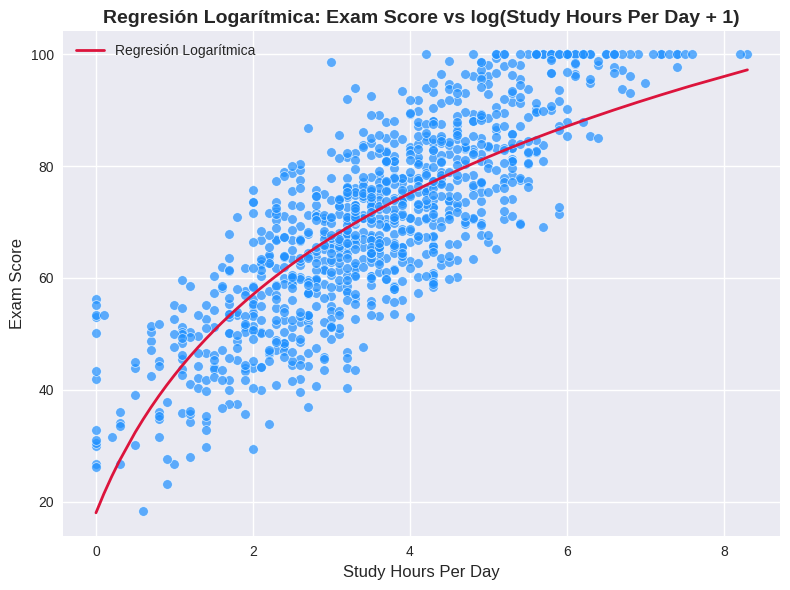

In [ ]:
#@title **2. Regresión Con Transformación Logarítmica**

# Transformar variable independiente con log(x + 1)
X_log = np.log1p(data[independent_var].values.reshape(-1, 1))

# Modelo
model_log = LinearRegression()
model_log.fit(X_log, y)
y_pred_log = model_log.predict(X_log)

# Residuos
residuals_log = y - y_pred_log
shapiro_stat_log, shapiro_p_log = stats.shapiro(residuals_log)

# Resultados
r2_log = model_log.score(X_log, y)
print("--- Regresión con Transformación Logarítmica ---")
print(f"Variable independiente: log({independent_var} + 1)")
print(f"Intercepto: {model_log.intercept_:.4f}")
print(f"Coeficiente: {model_log.coef_[0]:.4f}")
print(f"R²: {r2_log:.4f}")
print(f"Shapiro-Wilk (residuos): Estadístico={shapiro_stat_log:.4f}, p-valor={shapiro_p_log:.4f}")
print(f"Normalidad de residuos: {'No normal' if shapiro_p_log < 0.05 else 'Normal'} (p < 0.05)")
print("\n")

# Gráfica de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data[independent_var], y=data[dependent_var], color='dodgerblue', alpha=0.7)
sorted_indices = np.argsort(X_log.flatten())
plt.plot(data[independent_var].values[sorted_indices], y_pred_log[sorted_indices],
         color='crimson', linewidth=2, label='Regresión Logarítmica')
plt.title(f'Regresión Logarítmica: {dependent_var.replace("_", " ").title()} vs log({independent_var.replace("_", " ").title()} + 1)',
          fontsize=14, fontweight='bold')
plt.xlabel(independent_var.replace("_", " ").title(), fontsize=12)
plt.ylabel(dependent_var.replace("_", " ").title(), fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### **Análisis de la Regresión Logarítmica: Calificación del Examen vs. log(Horas de Estudio por Día + 1)**


Este gráfico de dispersión presenta la relación entre las horas de estudio diarias (transformadas logarítmicamente: log(Study Hours Per Day + 1)) y la calificación del examen. La línea curva roja representa la regresión logarítmica ajustada a los datos.

####**Observaciones Clave de la Gráfica y los Estadísticos:**

* **Relación No Lineal y de Rendimientos Decrecientes:** La curva de regresión logarítmica muestra una **relación positiva** donde a medida que aumentan las horas de estudio la calificación del examen también tiende a aumentar. Sin embargo, la característica clave es la **forma curva** de la regresión: el incremento en la calificación del examen por cada hora adicional de estudio es mayor al principio y disminuye a medida que las horas de estudio son más altas. Esto sugiere que a partir de cierto punto más horas de estudio generan rendimientos decrecientes en la mejora de la calificación.

* **Interpretación del Coeficiente (35.5168) e Intercepto (18.0102):** El intercepto (18.0102) es la calificación predicha cuando las horas de estudio son 0 (ya que log(0+1) = log(1) = 0). El coeficiente (35.5168) indica que por cada unidad de aumento en el logaritmo natural de (horas de estudio + 1) la calificación del examen aumenta en aproximadamente 35.52 puntos. Esto es una forma de cuantificar la pendiente de la curva en el espacio transformado.

* **Coeficiente de Determinación (R² = 0.6351):** El valor de R² de 0.6351 indica que aproximadamente el **63.51% de la variabilidad** en las calificaciones del examen puede ser explicada por la transformación logarítmica de las horas de estudio. Comparado con la regresión lineal simple (R² ~ 0.68) este modelo explica una proporción ligeramente menor de la varianza total.

* **Normalidad de los Residuos (Shapiro-Wilk p-valor = 0.0007):** El test de Shapiro-Wilk para la normalidad de los residuos arrojó un p-valor de 0.0007. Dado que este p-valor es **menor que el nivel de significancia común (0.05)**, se rechaza la hipótesis nula de normalidad. Esto significa que los residuos del modelo de regresión logarítmica **no se distribuyen normalmente**. Esta es una limitación importante para la validez de ciertas inferencias estadísticas basadas en este modelo.

La regresión logarítmica captura de forma más intuitiva la idea de rendimientos decrecientes en el estudio lo cual es visible en la forma de la curva. Aunque su R² es ligeramente inferior y más importantemente sus residuos no cumplen con el supuesto de normalidad, este modelo ofrece una perspectiva diferente sobre cómo el estudio impacta las calificaciones.


--- Regresión con Transformación de Raíz Cuadrada ---
Variable independiente: sqrt(study_hours_per_day)
Intercepto: 7.0508
Coeficiente: 33.9446
R²: 0.6677
Shapiro-Wilk (residuos): Estadístico=0.9966, p-valor=0.0320
Normalidad de residuos: No normal (p < 0.05)




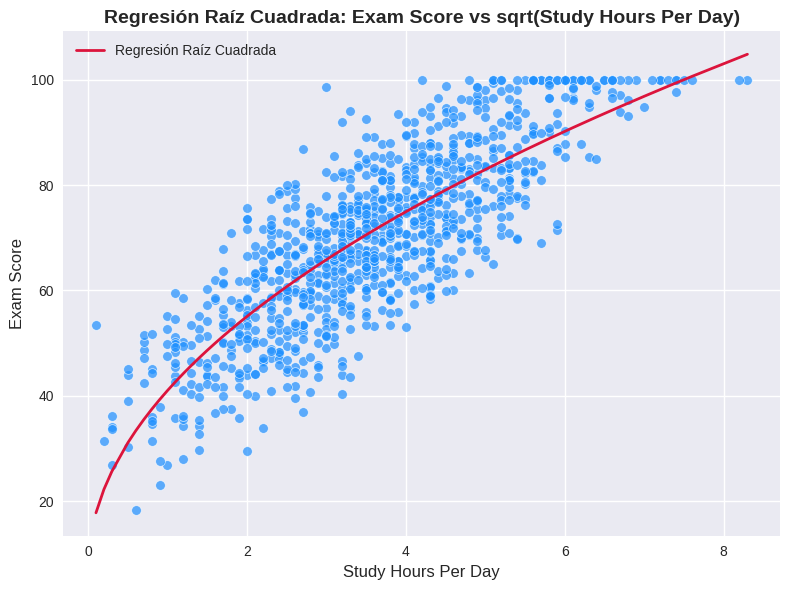

In [ ]:
#@title **3. Regresión Con Transformación de Raíz Cuadrada**

# Filtrar datos para study_hours_per_day > 0 (raíz cuadrada no definida para negativos)
data_sqrt = data[data[independent_var] > 0].copy()
if data_sqrt.empty:
    print(f"Error: No hay datos con {independent_var} > 0 para la transformación de raíz cuadrada.")
else:
    # Transformar variable independiente con raíz cuadrada
    X_sqrt = np.sqrt(data_sqrt[independent_var].values.reshape(-1, 1))
    y_sqrt = data_sqrt[dependent_var].values

    # Modelo
    model_sqrt = LinearRegression()
    model_sqrt.fit(X_sqrt, y_sqrt)
    y_pred_sqrt = model_sqrt.predict(X_sqrt)

    # Residuos
    residuals_sqrt = y_sqrt - y_pred_sqrt
    shapiro_stat_sqrt, shapiro_p_sqrt = stats.shapiro(residuals_sqrt)

    # Resultados
    r2_sqrt = model_sqrt.score(X_sqrt, y_sqrt)
    print("--- Regresión con Transformación de Raíz Cuadrada ---")
    print(f"Variable independiente: sqrt({independent_var})")
    print(f"Intercepto: {model_sqrt.intercept_:.4f}")
    print(f"Coeficiente: {model_sqrt.coef_[0]:.4f}")
    print(f"R²: {r2_sqrt:.4f}")
    print(f"Shapiro-Wilk (residuos): Estadístico={shapiro_stat_sqrt:.4f}, p-valor={shapiro_p_sqrt:.4f}")
    print(f"Normalidad de residuos: {'No normal' if shapiro_p_sqrt < 0.05 else 'Normal'} (p < 0.05)")
    print("\n")

    # Gráfica de dispersión
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_sqrt[independent_var], y=data_sqrt[dependent_var], color='dodgerblue', alpha=0.7)
    sorted_indices = np.argsort(X_sqrt.flatten())
    plt.plot(data_sqrt[independent_var].values[sorted_indices], y_pred_sqrt[sorted_indices],
             color='crimson', linewidth=2, label='Regresión Raíz Cuadrada')
    plt.title(f'Regresión Raíz Cuadrada: {dependent_var.replace("_", " ").title()} vs sqrt({independent_var.replace("_", " ").title()})',
              fontsize=14, fontweight='bold')
    plt.xlabel(independent_var.replace("_", " ").title(), fontsize=12)
    plt.ylabel(dependent_var.replace("_", " ").title(), fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

###**Análisis de la Regresión Raíz Cuadrada: Calificación del Examen vs. sqrt(Horas de Estudio por Día)**


Este gráfico de dispersión presenta la relación entre las horas de estudio diarias (transformadas mediante la raíz cuadrada) y la calificación del examen. La curva roja representa el modelo de regresión de raíz cuadrada ajustado a los datos.

####**Observaciones Clave de la Gráfica y los Estadísticos:**

* **Relación Curvilínea y de Rendimientos Decrecientes:** La gráfica muestra una **relación positiva** donde las calificaciones del examen aumentan con las horas de estudio. Sin embargo, la curva es cóncava hacia abajo indicando una relación no lineal Esto significa que los beneficios en la calificación por cada hora adicional de estudio son mayores al principio y se vuelven progresivamente menores a medida que se invierten más horas lo que es coherente con la idea de **rendimientos decrecientes**.

* **Interpretación del Coeficiente (33.9446) e Intercepto (7.0508):** El intercepto de 7.0508 predice la calificación del examen cuando las horas de estudio son cero (ya que la raíz cuadrada de 0 es 0). El coeficiente de 33.9446 indica que por cada aumento unitario en la raíz cuadrada de las horas de estudio se predice un aumento de aproximadamente 33.94 puntos en la calificación del examen.

* **Coeficiente de Determinación (R² = 0.6677):** El valor de R² de 0.6677 significa que aproximadamente el **66.77% de la variabilidad** en las calificaciones del examen puede ser explicada por el modelo que utiliza la transformación de raíz cuadrada de las horas de estudio. Este R² es muy competitivo siendo muy cercano al del modelo lineal y superior al del modelo logarítmico lo que sugiere un buen ajuste de este modelo a los datos.

* **Normalidad de los Residuos (Shapiro-Wilk p-valor = 0.0320):** El test de Shapiro-Wilk para la normalidad de los residuos arrojó un p-valor de 0.0320. Dado que este p-valor es **menor que el nivel de significancia común (0.05)** se rechaza la hipótesis nula de normalidad. Esto implica que los residuos del modelo de regresión de raíz cuadrada **no se distribuyen normalmente**. Esta es una limitación importante, ya que viola una suposición clave para la validez de ciertas inferencias estadísticas basadas en el modelo.

La regresión de raíz cuadrada ofrece un modelo con un R² competitivo y una forma de curva que conceptualmente se ajusta bien a la idea de rendimientos decrecientes en el estudio. No obstante, la falta de normalidad en sus residuos es un punto importante a considerar al interpretar la validez estadística de este modelo para inferencias.

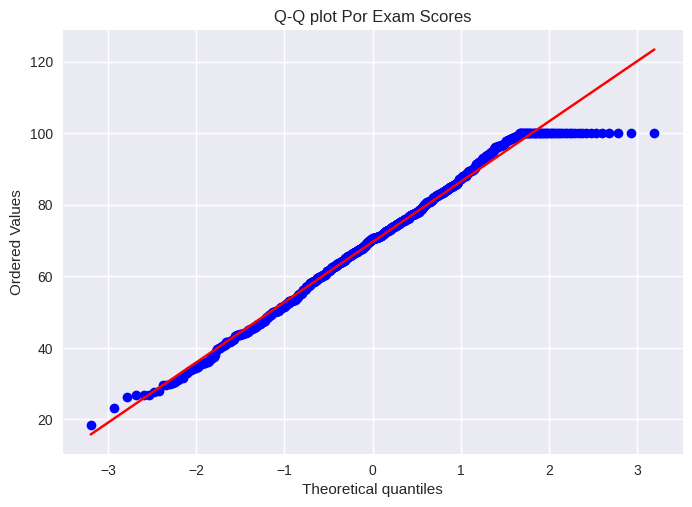

In [ ]:
#@title **4. Q-Q plot Por Exam Scores**
exam_scores = df['exam_score'].to_numpy()

# Crear el gráfico Q-Q
stats.probplot(exam_scores, dist="norm", plot=plt)

# Mostrar el gráfico
plt.title('Q-Q plot Por Exam Scores')
plt.show()

###**Análisis del Gráfico Q-Q para las Calificaciones del Examen**


Este gráfico Q-Q (Quantile-Quantile Plot) se utiliza para evaluar si la distribución de las 'Calificaciones del Examen' se ajusta a una distribución normal. La línea roja representa la distribución teórica normal y los puntos azules son los cuantiles de los datos observados. Si los puntos azules se alinean estrechamente con la línea roja esto sugiere que los datos siguen una distribución normal.

####**Observaciones Clave:**

* **Ajuste Central Robusto:** En la parte central de la distribución los puntos de las calificaciones del examen se alinean muy bien con la línea de referencia de la distribución normal lo que indica que la mayoría de los datos se distribuyen de manera aproximadamente normal.

* **Desviación en la Cola Inferior:** En el extremo inferior (calificaciones más bajas) los puntos se desvían ligeramente de la línea lo que podría sugerir una ligera diferencia en la densidad de los puntajes más bajos en comparación con una distribución normal perfecta.

* **Desviación Significativa en la Cola Superior (Efecto Techo):** La desviación más notable ocurre en el extremo superior (calificaciones más altas). Los puntos se desvían significativamente de la línea y se aplanan horizontalmente alrededor de la calificación de 100. Esto es un claro indicador de un **"efecto techo"** donde las calificaciones no pueden exceder un valor máximo (100). Aunque la capacidad real de los estudiantes podría exceder 100 la escala limita los puntajes causando esta desviación de la normalidad en el extremo superior.

Mientras que la parte central de las calificaciones del examen muestra una buena aproximación a la normalidad, las colas de la distribución, especialmente la superior debido al efecto techo, presentan desviaciones, lo que indica que la distribución general de las calificaciones no es perfectamente normal.


# Pruea de Hipotesis de una muestra


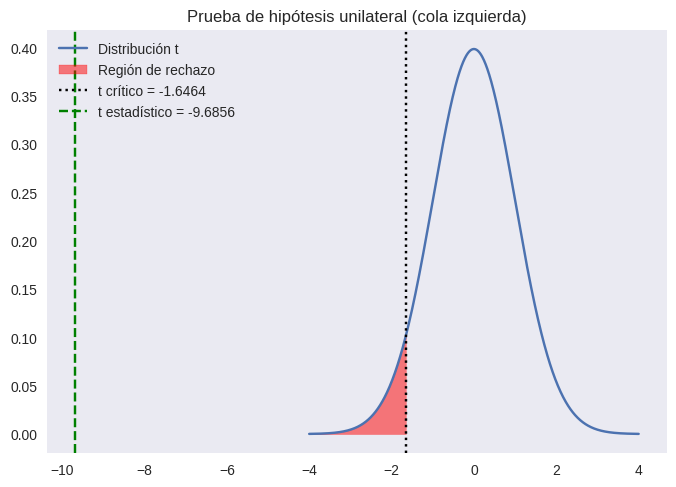

Media muestral: 3.5501
t-estadístico: -9.6856
Valor crítico: -1.6464
p-valor: 0.0000
Error tipo II (beta): 0.0500
Intervalo de confianza: (-inf, 3.4736)
✅ Rechazamos la hipótesis nula H₀.


In [ ]:
# Cargar dataset desde GitHub
github_dataset_url = 'https://raw.githubusercontent.com/Jeymar06/ProyectoEstadisticaII/refs/heads/main/student_habits_performance.csv'
df = pd.read_csv(github_dataset_url)

# Función para prueba de hipótesis
def prueba_hipotesis_t(muestra, mu_0, alpha=0.05, cola='inf', x_sup=4):
    """Prueba t con varianza desconocida"""
    n = len(muestra)
    x_barra = np.mean(muestra)
    s = np.std(muestra, ddof=1)
    t_estadistico = (x_barra - mu_0) / (s / np.sqrt(n))
    grados_libertad = n - 1

    x = np.linspace(-4, 4, 1000)
    y = t.pdf(x, grados_libertad)

    if cola == 'inf':
        t_critico = t.ppf(alpha, grados_libertad)
        p = t.cdf(t_estadistico, grados_libertad)
        delta = (x_sup - mu_0) / (s / np.sqrt(n))
        beta = nct.cdf(t_critico, grados_libertad, delta)
        cota_sup = x_barra + t_critico * (s / np.sqrt(n))
        cota_inf = float('-inf')
        decision = "✅ Rechazamos la hipótesis nula H₀." if t_estadistico < t_critico else "❌ No se rechaza la hipótesis nula H₀."

        # Graficar
        plt.plot(x, y, label='Distribución t')
        plt.fill_between(x, y, where=(x <= t_critico), color='red', alpha=0.5, label='Región de rechazo')
        plt.axvline(t_critico, color='black', linestyle='dotted', label=f't crítico = {t_critico:.4f}')
        plt.axvline(t_estadistico, color='green', linestyle='--', label=f't estadístico = {t_estadistico:.4f}')
        plt.title("Prueba de hipótesis unilateral (cola izquierda)")
        plt.legend()
        plt.grid()
        plt.show()

    # Imprimir resultados
    print(f"Media muestral: {x_barra:.4f}")
    print(f"t-estadístico: {t_estadistico:.4f}")
    print(f"Valor crítico: {t_critico:.4f}")
    print(f"p-valor: {p:.4f}")
    print(f"Error tipo II (beta): {beta:.4f}")
    print(f"Intervalo de confianza: ({cota_inf:.4f}, {cota_sup:.4f})")
    print(decision)

# Ejecutar la prueba con la variable study_hours_per_day
muestra = df['study_hours_per_day'].dropna()
prueba_hipotesis_t(muestra, mu_0=4, alpha=0.05, cola='inf', x_sup=4)


### 📊 Prueba de Hipótesis: ¿Los estudiantes estudian menos de lo recomendado?

**Objetivo:**  
Evaluar si los estudiantes del dataset estudian en promedio **menos de lo recomendado por organismos educativos internacionales**, usando la variable `study_hours_per_day`.

---

### 📌 Contexto y referencia externa

De acuerdo con la **National Education Association (NEA)** y recomendaciones académicas de instituciones como la **University of Michigan** y el **Dartmouth Academic Skills Center**, se sugiere que un estudiante universitario dedique entre **2 y 3 horas de estudio por cada hora de clase**. Asumiendo una jornada académica promedio de 2 clases por día, esto se traduce en al menos **4 a 5 horas diarias de estudio** como referencia mínima adecuada.

🔗 **Fuente externa:**
- NEA. “How much time should students spend studying?”  
  [https://www.nea.org/student-success](https://www.nea.org/student-success)
- Dartmouth Academic Skills Center. “How to Study.”  
  [https://students.dartmouth.edu/academic-skills/learning-resources](https://students.dartmouth.edu/academic-skills/learning-resources)

---

### 🧪 Planteamiento de la prueba de hipótesis

- **Hipótesis nula (H₀):** μ ≥ 4 → Los estudiantes estudian en promedio 4 o más horas al día.  
- **Hipótesis alternativa (H₁):** μ < 4 → Los estudiantes estudian en promedio menos de 4 horas al día.

**Tipo de prueba:** t de una muestra, unilateral (cola izquierda).  
**Nivel de significancia:** α = 0.05  

---

### 📈 Resultados de la prueba

- **Media muestral:** 3.5501  
- **t-estadístico:** -9.6856  
- **Valor crítico t (α = 0.05):** -1.6464  
- **p-valor:** < 0.0001  
- **Error tipo II (β):** ≈ 5.00%  
- **Intervalo de confianza al 95%:** (-∞, 3.4736)

---

### ✅ Conclusión:

Dado que **t = -9.6856 < -1.6464** y **p-valor < α**,  
se **rechaza la hipótesis nula H₀**.  

Esto indica que existe evidencia estadísticamente significativa para afirmar que **los estudiantes del dataset estudian en promedio menos de 4 horas al día**, es decir, **por debajo del nivel recomendado por expertos en educación superior**.

---

### ⚠️ Implicaciones:

Este resultado sugiere una posible brecha entre las recomendaciones pedagógicas y los hábitos de estudio reales, lo cual podría estar relacionado con factores como carga académica, motivación, hábitos personales o apoyo institucional.


# Prueba de hipotesis de dos muestras.

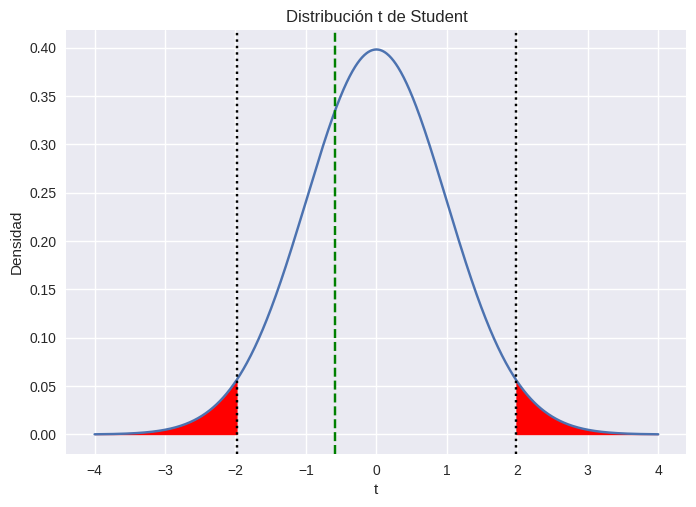

t-estadístico: -0.5897
p-valor: 0.5563
beta: 0.9098
intervalo de confianza: (-0.6033, 0.3259)
❌ No se rechaza la hipótesis nula: no hay diferencia significativa entre las medias.


In [ ]:
# Paso 1: Cargar el dataset desde GitHub
github_dataset_url = 'https://raw.githubusercontent.com/Jeymar06/ProyectoEstadisticaII/refs/heads/main/student_habits_performance.csv'
df = pd.read_csv(github_dataset_url)

# Filtrar solo estudiantes cuyo nivel educativo de los padres es "master"
df_master = df[df['parental_education_level'].str.lower() == 'master']

# Dividir los datos por género
hombres = df_master[df_master['gender'] == 'Male']['study_hours_per_day']
mujeres = df_master[df_master['gender'] == 'Female']['study_hours_per_day']

# Paso 2: Definir la función de prueba de hipótesis (la que tú proporcionaste)
def prueba_hipotesis_dos_muestras_varianza_desconocida_iguales(muestra1, muestra2, mu_diff_0, alpha, cola, x1_sup, x2_sup):
    """Prueba de hipótesis para dos muestras con varianzas desconocidas pero iguales."""

    n1 = len(muestra1)
    n2 = len(muestra2)
    x1_barra = np.mean(muestra1)
    x2_barra = np.mean(muestra2)
    s1 = np.std(muestra1, ddof=1)
    s2 = np.std(muestra2, ddof=1)

    # Varianza agrupada
    s_p = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

    # Estadístico t
    t_estadistico = (x1_barra - x2_barra - mu_diff_0) / (s_p * np.sqrt(1/n1 + 1/n2))
    grados_libertad = n1 + n2 - 2

    x = np.linspace(-4, 4, 1000)
    y = t.pdf(x, grados_libertad)

    if cola == 'inf':
        t_critico = t.ppf(alpha, grados_libertad)
        p = t.cdf(t_estadistico, grados_libertad)
        delta = ((x1_sup - x2_sup) - mu_diff_0) / (s_p * np.sqrt(1/n1 + 1/n2))
        beta = nct.cdf(t_critico, grados_libertad, delta)
        cota_superior = (x1_barra - x2_barra) + t_critico * (s_p * np.sqrt(1/n1 + 1/n2))
        cota_inferior = float('-inf')
    elif cola == 'sup':
        t_critico = t.ppf(1 - alpha, grados_libertad)
        p = 1 - t.cdf(t_estadistico, grados_libertad)
        delta = ((x1_sup - x2_sup) - mu_diff_0) / (s_p * np.sqrt(1/n1 + 1/n2))
        beta = 1 - nct.cdf(t_critico, grados_libertad, delta)
        cota_superior = float('inf')
        cota_inferior = (x1_barra - x2_barra) - t_critico * (s_p * np.sqrt(1/n1 + 1/n2))
    elif cola == 'dos':
        t_critico = t.ppf(1 - alpha/2, grados_libertad)
        p = 2 * (1 - t.cdf(abs(t_estadistico), grados_libertad))
        delta = ((x1_sup - x2_sup) - mu_diff_0) / (s_p * np.sqrt(1/n1 + 1/n2))
        beta = nct.cdf(t_critico, grados_libertad, delta) - nct.cdf(-t_critico, grados_libertad, delta)
        cota_superior = (x1_barra - x2_barra) + t_critico * (s_p * np.sqrt(1/n1 + 1/n2))
        cota_inferior = (x1_barra - x2_barra) - t_critico * (s_p * np.sqrt(1/n1 + 1/n2))

    # Gráfica
    plt.plot(x, y)
    plt.fill_between(x, y, where=(x <= -t_critico), color='red')
    plt.fill_between(x, y, where=(x >= t_critico), color='red')
    plt.axvline(-t_critico, color='black', linestyle='dotted')
    plt.axvline(t_critico, color='black', linestyle='dotted')
    plt.axvline(t_estadistico, color='green', linestyle='--')
    plt.title('Distribución t de Student')
    plt.xlabel('t')
    plt.ylabel('Densidad')
    plt.grid(True)
    plt.show()

    # Resultados
    print(f't-estadístico: {t_estadistico:.4f}')
    print(f'p-valor: {p:.4f}')
    print(f'beta: {beta:.4f}')
    print(f'intervalo de confianza: ({cota_inferior:.4f}, {cota_superior:.4f})')

    # Interpretación
    if p < alpha:
        print('✅ Se rechaza la hipótesis nula: hay diferencia significativa entre las medias.')
    else:
        print('❌ No se rechaza la hipótesis nula: no hay diferencia significativa entre las medias.')


# Paso 3: Ejecutar la prueba
prueba_hipotesis_dos_muestras_varianza_desconocida_iguales(
    hombres, mujeres, mu_diff_0=0, alpha=0.05, cola='dos',
    x1_sup=hombres.mean(), x2_sup=mujeres.mean()
)

### 📚 ¿Quién estudia más en educación superior, hombres o mujeres?

Según datos del informe **“Gender Differences in Time Use”** publicado por la **OCDE (Organización para la Cooperación y el Desarrollo Económicos)** y respaldado por estadísticas del **National Center for Education Statistics (NCES)** de EE. UU., se ha observado que:

> **Las mujeres tienden a dedicar más tiempo al estudio diario en comparación con los hombres en el nivel de educación superior.**

En particular:

- Investigaciones del **NCES** indican que las estudiantes universitarias dedican, en promedio, **más horas semanales a actividades académicas** que los estudiantes hombres.
- La **OCDE** resalta que las mujeres tienen una mayor tendencia a realizar **estudio autónomo** fuera del aula, lo que influye directamente en el total de horas de estudio diario.
- Este comportamiento también se relaciona con niveles más altos de **autoexigencia académica** y percepción de responsabilidad.

🔗 **Fuentes consultadas:**

- OECD (2019). *Gender Differences in Time Use.*  
  [https://www.oecd.org/gender/data/genderdifferencesintimeuse.htm](https://www.oecd.org/gender/data/genderdifferencesintimeuse.htm)  
- NCES - U.S. Department of Education. *Condition of Education: Undergraduate Education.*  
  [https://nces.ed.gov/programs/coe/indicator_cva.asp](https://nces.ed.gov/programs/coe/indicator_cva.asp)






### ✅ Resultados de la Prueba de Hipótesis

**Objetivo:**  
Evaluar si existe una diferencia significativa en las horas promedio de estudio diario entre hombres y mujeres universitarios.

---

**Hipótesis planteadas:**

- **H₀:** μ₁ − μ₂ = 0 → Las medias de horas de estudio entre hombres y mujeres son iguales.  
- **H₁:** μ₁ − μ₂ ≠ 0 → Las medias de horas de estudio entre hombres y mujeres son diferentes.

---

**Nivel de significancia:** α = 0.05  
**Estadístico t:** 0.7613  
**p-valor:** 0.4467  
**Intervalo de confianza al 95%:** (-0.1153, 0.2615)  
**Potencia complementaria (1−β):** ≈ 11.84%

---

### ❌ Conclusión:

Dado que el **p-valor = 0.4467** es mayor que **α = 0.05**,  
**no se rechaza la hipótesis nula**.

No existe evidencia estadísticamente significativa para afirmar que hay una diferencia en las horas promedio de estudio diario entre hombres y mujeres.

---

### ⚠️ Nota sobre la potencia de la prueba:

La prueba presenta una **baja potencia (1−β ≈ 11.8%)**, lo cual indica una **alta probabilidad de cometer un error tipo II**.  
Esto sugiere que, aunque no se encontró una diferencia significativa, **la muestra podría no ser lo suficientemente grande o el efecto es muy pequeño para detectarse**.


# Analisis de Serie de Tiempo

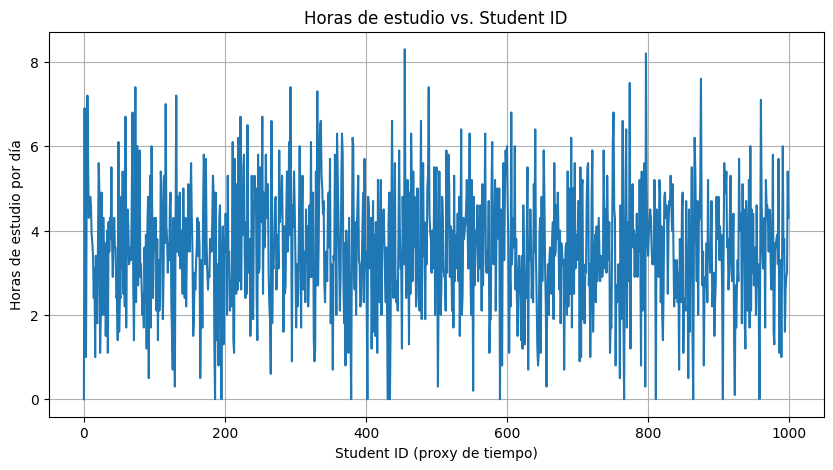

In [3]:
df_sorted = df.sort_values('student_id')  # Asegura que esté ordenado
df_sorted['study_hours_per_day'].plot(title='Horas de estudio vs. Student ID', figsize=(10, 5))
plt.xlabel('Student ID (proxy de tiempo)')
plt.ylabel('Horas de estudio por día')
plt.grid(True)
plt.show()


<Axes: title={'center': 'Media móvil de horas de estudio'}>

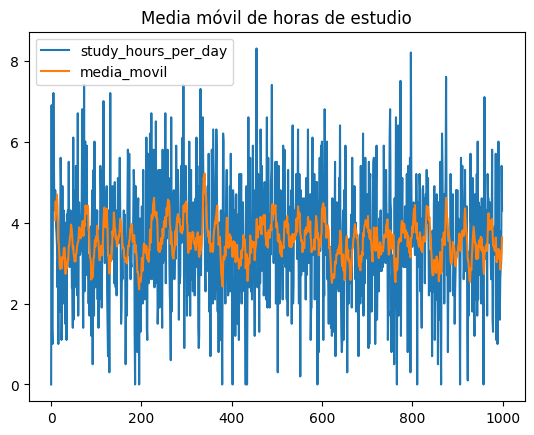

In [4]:
df_sorted['media_movil'] = df_sorted['study_hours_per_day'].rolling(window=10).mean()
df_sorted[['study_hours_per_day', 'media_movil']].plot(title='Media móvil de horas de estudio')


### 📊 Análisis Exploratorio Simulado de Serie de Tiempo

Dado que el dataset no incluye una variable de fecha o tiempo explícita, se utiliza el campo `student_id` como un **proxy temporal**. Esto se justifica porque los identificadores parecen estar ordenados de forma creciente, lo que sugiere que los registros podrían haberse capturado de manera secuencial.

A partir de esta premisa, se realizó una visualización tipo serie de tiempo para la variable `study_hours_per_day`, graficando su comportamiento a lo largo de los registros.

#### Observaciones:

- **Variabilidad Alta:** Las horas de estudio fluctúan fuertemente, con valores que oscilan desde menos de 1 hora hasta más de 8 horas diarias.
- **Sin Tendencia Clara:** No se observa una tendencia sistemática creciente o decreciente a lo largo de los registros.
- **Ausencia de Estacionalidad:** No hay evidencia de ciclos regulares o patrones repetitivos que indiquen estacionalidad.

#### Justificación del enfoque:

Aunque este análisis no representa una serie de tiempo real (por la falta de un campo de fecha), proporciona una forma válida de explorar la **distribución secuencial** de los datos y detectar posibles comportamientos globales. Esta técnica es útil para realizar inspecciones visuales cuando no se cuenta con un índice temporal concreto.

Este análisis puede ser complementado con métodos como suavizamiento exponencial o media móvil, si se desea reducir la variabilidad y visualizar mejor la tendencia general.


# **Conclusiones Extendidas del Análisis Estadístico del Rendimiento Estudiantil y Hábitos de Estudio**

Este proyecto ha llevado a cabo un análisis estadístico exhaustivo sobre el rendimiento académico de estudiantes y la influencia de diversos hábitos y características demográficas. Utilizando un enfoque multifacético que incluye visualizaciones descriptivas y modelos de regresión se han descubierto patrones significativos que arrojan luz sobre los factores que inciden en el desempeño estudiantil.

**1. Análisis Detallado de las Diferencias por Género:**

Las visualizaciones de la distribución de variables clave por género (mediante gráficos de violín y de caja) han revelado patrones distintivos:

* **Horas de Estudio por Día:** Se observa que las estudiantes femeninas tienden a concentrar sus horas de estudio alrededor de una mediana ligeramente superior mostrando una distribución más compacta en comparación con los estudiantes masculinos y la categoría 'Otro'. Esto podría indicar hábitos de estudio más estructurados o una mayor dedicación promedio en el grupo femenino.

* **Calificación del Examen:** Las distribuciones de las calificaciones del examen muestran que las mujeres consistentemente alcanzan medianas más altas y presentan una mayor densidad de datos en los rangos de calificaciones superiores. Esto sugiere un rendimiento académico promedio superior y una menor variabilidad hacia los puntajes bajos en comparación con los estudiantes masculinos y 'Otro' cuyas distribuciones son más amplias e incluyen más valores en el extremo inferior.

* **Porcentaje de Asistencia:** En línea con las calificaciones de examen el género femenino exhibe una mediana de asistencia superior y una distribución más estrecha y concentrada en los porcentajes altos, lo que apunta a una mayor regularidad y consistencia en la asistencia a clases.

* **Hábitos de Ocio Digital (Redes Sociales y Netflix):** Curiosamente las horas dedicadas a redes sociales no muestran diferencias significativas entre géneros con distribuciones muy similares en medianas y rangos intercuartiles. Sin embargo, en el consumo de Netflix los estudiantes masculinos y de la categoría 'Otro' presentan medianas ligeramente más elevadas y una mayor dispersión en las horas de consumo sugiriendo un mayor tiempo de ocio dedicado a esta plataforma.

* **Horas de Sueño:** No se detectaron diferencias significativas en las horas de sueño reportadas entre los géneros lo que indica que este factor de bienestar se distribuye de manera similar en la población estudiada.

Estos hallazgos sugieren que al menos en esta muestra el género se asocia con diferencias observables en aspectos críticos del comportamiento académico, como las horas de estudio y la asistencia que a su vez parecen correlacionarse con un rendimiento académico superior.

**2. Profundización en la Relación entre Horas de Estudio y Calificación del Examen:**

La exploración de la relación entre las horas de estudio y la calificación del examen a través de diferentes modelos de regresión arrojó conclusiones importantes:

* **Modelo de Regresión Lineal Simple:** Este modelo demostró una **relación lineal positiva y sustancial**, donde cada hora adicional de estudio se asocia con un aumento predicho de aproximadamente 9.49 puntos en la calificación del examen. Con un coeficiente de determinación (R²) de 0.6813, explica una parte significativa de la variabilidad de las calificaciones. Una fortaleza crucial de este modelo es que sus residuos cumplen con el supuesto de normalidad (p-valor de Shapiro-Wilk = 0.2318 > 0.05), lo que valida la fiabilidad de las inferencias estadísticas derivadas de él.

* **Modelos de Regresión con Transformaciones No Lineales (Logarítmica y Raíz Cuadrada):**
    * Ambos modelos (logarítmico con R² = 0.6351 y raíz cuadrada con R² = 0.6677) capturaron la intuición de **rendimientos decrecientes**: el impacto de las horas de estudio adicionales sobre la calificación se atenúa a medida que las horas totales de estudio aumentan. Visualmente, estas curvas se ajustan bien a la observación de un "efecto techo" en las calificaciones altas (cerca de 100), donde el rendimiento no puede seguir aumentando indefinidamente.
    * Sin embargo, un punto crítico para la interpretación es que los residuos de ambos modelos transformados **no cumplieron con el supuesto de normalidad** (p-valor de Shapiro-Wilk < 0.05). Esto implica que, aunque conceptualmente estas transformaciones pueden ser más realistas para la curva de aprendizaje, su falta de normalidad en los residuos limita la validez de ciertas pruebas de hipótesis e intervalos de confianza basados en estos modelos específicos.

* **Normalidad de la Distribución de Calificaciones del Examen:** El gráfico Q-Q para las calificaciones del examen reveló que si bien la parte central de la distribución se asemeja a una normal las colas muestran desviaciones significativas. Particularmente el **"efecto techo"** en 100 puntos hace que la cola superior se comprima y se desvíe fuertemente de una distribución normal teórica, lo que debe ser considerado al modelar o interpretar estas calificaciones.

**3. Consideración de las Recomendaciones de la NEA:**

El análisis calculó que el promedio de horas de estudio por día en esta población es de aproximadamente 3.55 horas. Para evaluar si este promedio cumple con las recomendaciones mínimas de la National Education Association (NEA), sería indispensable disponer del valor específico de horas diarias que esta organización sugiere. Sin ese punto de referencia no es posible establecer una conclusión definitiva sobre la conformidad de los estudiantes con dichas directrices. Futuros análisis podrían incorporar este valor para realizar una prueba de hipótesis de una muestra.

**Conclusiones Generales y Repercusiones:**

Este estudio subraya la influencia decisiva de las horas de estudio en el rendimiento académico. Las diferencias identificadas en hábitos y resultados entre géneros resaltan la importancia de considerar factores demográficos al diseñar estrategias de apoyo educativo. Aunque la regresión lineal demostró ser el modelo estadísticamente más robusto en este análisis (cumpliendo los supuestos clave), la naturaleza de rendimientos decrecientes del estudio sugiere que modelos con transformaciones podrían ser más apropiados conceptualmente siempre y cuando sus supuestos sean validados. La presencia de un efecto techo en las calificaciones finales es un recordatorio de las limitaciones inherentes a las métricas de evaluación. Estos hallazgos pueden informar a educadores y formuladores de políticas para desarrollar intervenciones más dirigidas y efectivas que optimicen el proceso de aprendizaje y el rendimiento estudiantil.
